### sklearn.metrics.f1_score
- sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

### sklearn.metrics.accuracy_score
- sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

### sklearn.metrics.precision_score
- sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

### sklearn.metrics.confusion_matrix
- sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [44]:
# titanic_train.csv 읽기
import pandas as pd
df_titanic = pd.read_csv('./Datasets/diabetes.csv')
df_titanic.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [10]:
# loc를 활용하여 feature (Survived , Sex , Age ,Pclass) 와 label 만으로 이뤄진 데이타프레임
df_titanic =df_titanic.loc[: , ['Survived' , 'Sex' , 'Age' ,'Pclass']]

In [11]:
# feature를 X로 label를 y로 저장
X = df_titanic.drop('Survived' , axis=1)
y = df_titanic['Survived']

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

labels = encoder.fit_transform(X['Sex'])

X['Sex'] = labels

In [13]:
import numpy as np
# MinMaxScaler를 이용해서 Age를 스케일링
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터셋 변환, fit()과 transfom() 호출
age = np.array(X['Age']).reshape(-1,1)
scaler.fit(age)
age = scaler.transform(age)
X['Age'] = age

In [15]:
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1score: {3:.4f}'.format(accuracy, precision, recall, f1score))
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df_titanic = pd.read_csv('./datasets/titanic_train.csv')
df_titanic = df_titanic.loc[:,['Survived', 'Sex', 'Age', 'Pclass']]
X = df_titanic.loc[:,['Sex', 'Age', 'Pclass']]
y = df_titanic['Survived']
X['Age'].fillna(method='ffill', inplace=True)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(X['Sex'])
X['Sex'] = labels
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[['Age']])
age_scaled = scaler.transform(X[['Age']])
X['Age']=age_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424, 재현율: 0.8033, f1score: 0.7717


In [17]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape :  {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n: ', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis =1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape :  (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
:  [[0.42558527 0.57441473]
 [0.88833758 0.11166242]
 [0.88651722 0.11348278]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.42558527 0.57441473 1.        ]
 [0.88833758 0.11166242 0.        ]
 [0.88651722 0.11348278 0.        ]]


### sklearn.preprocessing.Binarizer
- class sklearn.preprocessing.Binarizer(*, threshold=0.0, copy=True)

In [18]:
from sklearn.preprocessing import Binarizer, binarize

x = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

binarize = Binarizer(threshold=1.1)
print(binarize.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [19]:
custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarize = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarize.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424, 재현율: 0.8033, f1score: 0.7717


In [20]:
custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarize = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarize.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)



오차행렬
[[94 24]
 [10 51]]
정확도: 0.8101, 정밀도: 0.6800, 재현율: 0.8361, f1score: 0.7500


In [21]:
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarize = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarize.transform(pred_proba_c1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 :  0.4
오차행렬
[[94 24]
 [10 51]]
정확도: 0.8101, 정밀도: 0.6800, 재현율: 0.8361, f1score: 0.7500
임계값 :  0.45
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, f1score: 0.7576
임계값 :  0.5
오차행렬
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424, 재현율: 0.8033, f1score: 0.7717
임계값 :  0.55
오차행렬
[[107  11]
 [ 17  44]]
정확도: 0.8436, 정밀도: 0.8000, 재현율: 0.7213, f1score: 0.7586
임계값 :  0.6
오차행렬
[[111   7]
 [ 21  40]]
정확도: 0.8436, 정밀도: 0.8511, 재현율: 0.6557, f1score: 0.7407


### sklearn.metrics.precision_recall_curve
- sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)

In [22]:
from sklearn.metrics import precision_recall_curve

In [25]:
#레이블 값이 1일때의 예츠그 확률울 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
#실제값 데이터셋과 레이블값이 1일 떄의 예측 확률을 precision_recall_curve인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곘값 배열의 shape', thresholds.shape)
print('반환된 precisions 배열의 shape', precisions.shape)
print('반환된 recalls 배열의 shape', recalls.shape)
print("\nthresholds 5 samples:", thresholds[:5])
print("precisions 5 samples:", precisions[:5])
print("recalls 5 samples:", recalls[:5])

반환된 분류 결정 임곘값 배열의 shape (124,)
반환된 precisions 배열의 shape (125,)
반환된 recalls 배열의 shape (125,)

thresholds 5 samples: [0.06556004 0.07136752 0.0776467  0.07896181 0.08303016]
precisions 5 samples: [0.34078212 0.34269663 0.34659091 0.35057471 0.35465116]
recalls 5 samples: [1. 1. 1. 1. 1.]


In [27]:
recalls.shape

(125,)

In [29]:
precisions.shape

(125,)

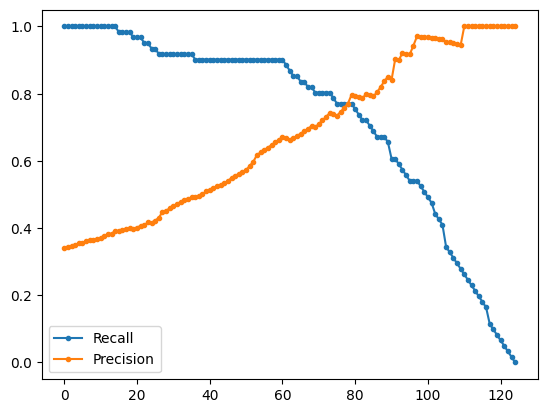

In [32]:
import matplotlib.pyplot as plt
plt.plot(recalls, marker='.', label = "Recall")
plt.plot(precisions, marker='.', label = "Precision")
plt.legend()
plt.show()

### sklearn.metrics.roc_curve
- sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

In [33]:
from sklearn.metrics import roc_curve

In [34]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs , thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index],2))

print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:', np.round(fprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66]
샘플 index로 추출한 임곗값 :  [0.95 0.81 0.65 0.6  0.55 0.47 0.4  0.27 0.18 0.13 0.12 0.11 0.1  0.08]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.059 0.102 0.178 0.212 0.314 0.466 0.542 0.678 0.754
 0.839 0.941]
샘플 임곗값별 TPR: [0.    0.008 0.025 0.059 0.102 0.178 0.212 0.314 0.466 0.542 0.678 0.754
 0.839 0.941]


In [35]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds=roc_curve(y_test, pred_proba_c1)

    plt.plot(fprs, tprs, label="ROC")

    plt.plot([0,1],[0,1], "k--", label = "Random")

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0,1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

TypeError: Cannot interpret '1' as a data type

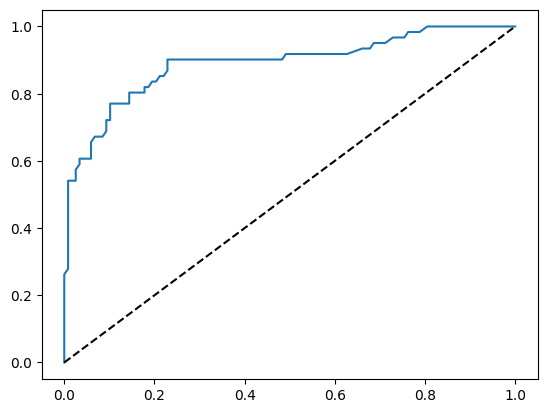

In [39]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])